# Let's start by loading all the required libraries.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from IPython.display import display

In [64]:
# Load the Diabetes dataset
data = pd.read_csv("./Diabetes.csv")

# Summary of the records
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [65]:
# Display the first 10 record
print("\nDisplay the first 10 record")
display(data.head(10))


Display the first 10 record


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [66]:
# Describe the data
print("Statistical description of dataset\n--------------------------------------")
display(data.describe())

Statistical description of dataset
--------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Total number of individuals: 768
Individuals with diabetes: 268
Individuals without diabetes: 500
Percentage of individuals with diabetes: 34.90%



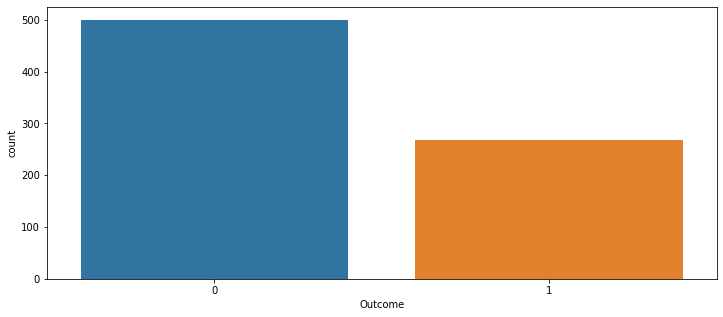

In [67]:
# Evaluate the balance(number of instances per lebel) of the data set
n_records = data.shape[0]
n_with_diabetes = data[data["Outcome"] == 1].shape[0]
n_without_diabetes = data[data["Outcome"] == 0].shape[0]
greater_percent = (n_with_diabetes*100)/float(n_records)

print("\nTotal number of individuals: {}".format(n_records))
print("Individuals with diabetes: {}".format(n_with_diabetes))
print("Individuals without diabetes: {}".format(n_without_diabetes))
print("Percentage of individuals with diabetes: {:.2f}%\n".format(greater_percent))

# Count of instances per Target/Label variable Viz
sns.countplot(data['Outcome'], label="Count")

Note - Since 500 out of 768 individuals don't have diabetes, so it would considered as an unbalanced dataset.

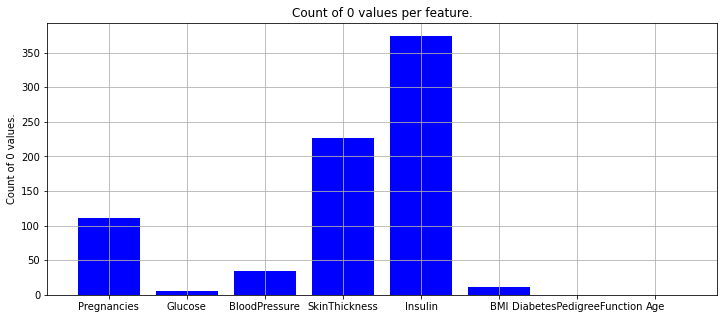

In [68]:
# Missing Or Unwanted 0 values
featurelist = []
count_of_zero_list = []

for column in data:
  if column == 'Outcome':
    break

  featurelist.append(column)
  count_of_zero_list.append((data[column] == 0).sum())

x_pos = np.arange(len(featurelist))
plt.bar(featurelist, count_of_zero_list, align='center', color='b')

plt.ylabel('Count of 0 values.')
plt.title('Count of 0 values per feature.')
plt.grid(True)

plt.show()

Features like 'SkinThickness', 'Insulin' have a significant number of 0 values.

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

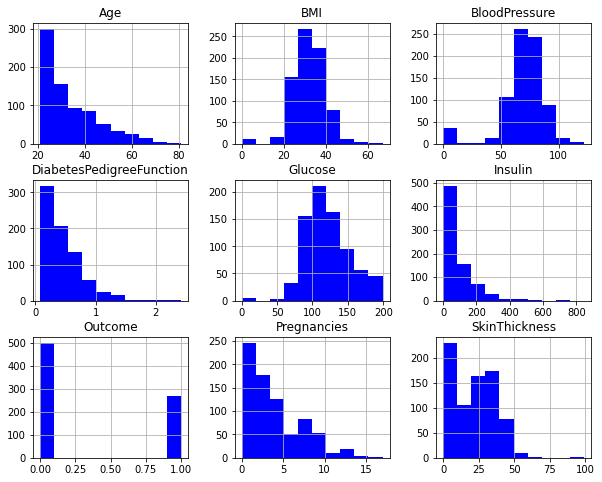

In [71]:
data.hist(figsize=(10, 8), color='b')
pd.DataFrame.skew(data, axis=0)

Most attributes like Age, DiabetesPedigree Function, Insuiln are highly skewed towords left.
**Significant number of missing or zero values for features like 'Insulin' and 'SkinThickness' have significant effect on their distribution. While building the model, these should be imputed properly.

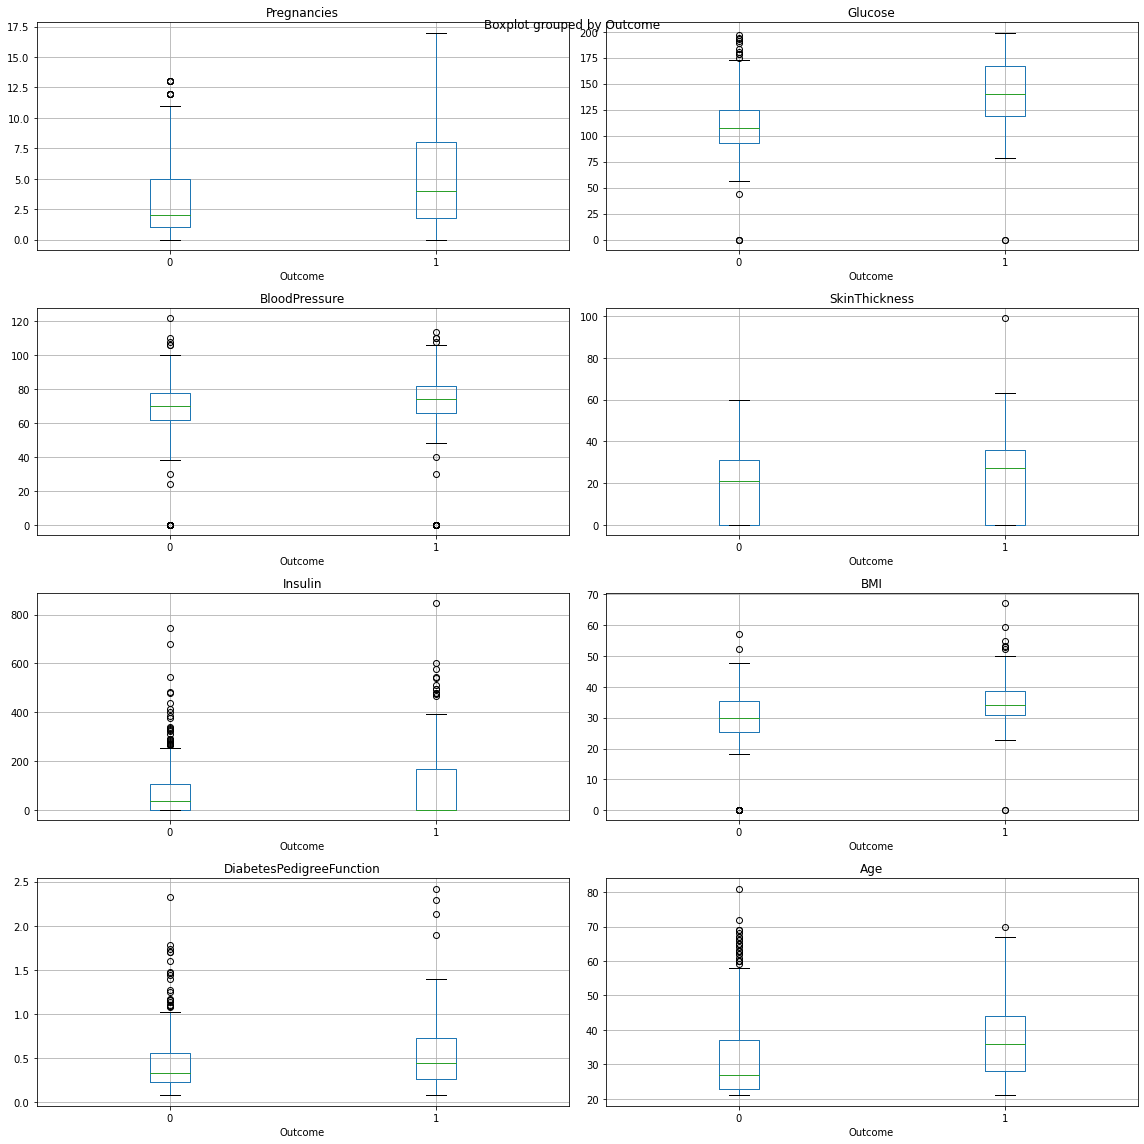

In [72]:
# Comparing distributions, the centre, spread and overall range  w.r.t two binary outcome(0/1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

data.boxplot(column='Pregnancies', by='Outcome', ax=axes[0, 0])
data.boxplot(column='Glucose', by='Outcome', ax=axes[0, 1])
data.boxplot(column='BloodPressure', by='Outcome', ax=axes[1, 0])
data.boxplot(column='SkinThickness', by='Outcome', ax=axes[1, 1])
data.boxplot(column='Insulin', by='Outcome', ax=axes[2, 0])
data.boxplot(column='BMI', by='Outcome', ax=axes[2, 1])
data.boxplot(column='DiabetesPedigreeFunction', by='Outcome', ax=axes[3, 0])
data.boxplot(column='Age', by='Outcome', ax=axes[3, 1])

fig.tight_layout()

Text(0.5, 0.98, 'Attribute Correlation Matrix')

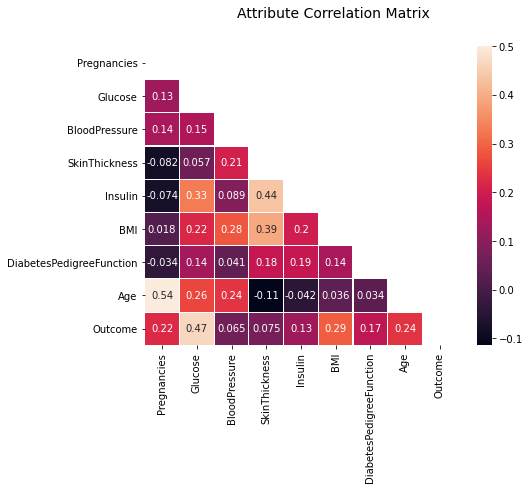

In [73]:
# Calculate correlation.
corr = data.corr()

# Plot correlation matrix.
fig = plt.figure(figsize=(7, 5.5))
# Create mask to cover the upper triangle.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5, linewidths=0.1)
fig.suptitle('Attribute Correlation Matrix', fontsize=14)